Assignment on preprocessing
Do the following on titanic dataset
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Loading dataset
titanic = pd.read_csv('/content/titanic_dataset (1).csv')

In [7]:
df = titanic
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Checking the basic details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Making 'PassengerId' as index column**

In [9]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# **Handling Missing Values**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns having null values
1. Age - float64
2. Cabin - object- since there are numerous null values we can drop this column
3. Embarked - object -we use mode to replace null values

In [15]:
#dropping Cabin column
df.drop("Cabin",axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [52]:
for i in ['Embarked']:
  df[i] = df[i].fillna(df[i].mode())

In [29]:
df.Age.skew()

0.38910778230082704

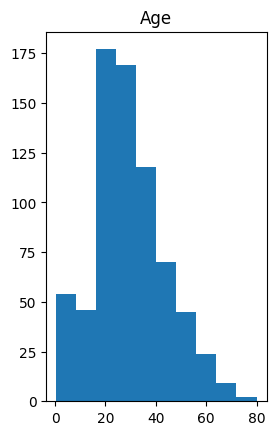

In [41]:
plt.subplot(1,2,1)
plt.hist(df.Age)
plt.title('Age')
plt.subplots_adjust(wspace=.25)
plt.show()

In [42]:
#since the graph is skewed we can fill the missing values by median
for i in ['Age']:
  df[i] = df[i].fillna(df[i].median)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [56]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**OUtlier Handling**

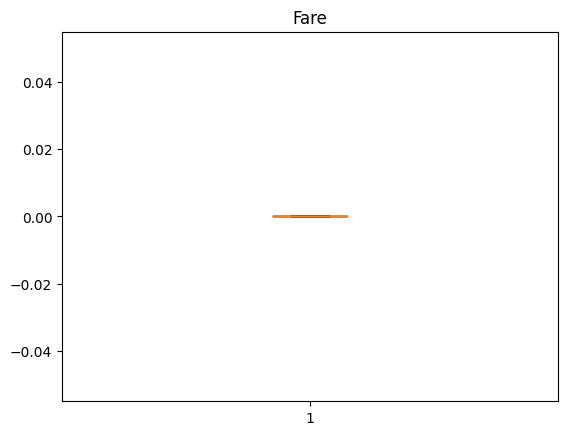

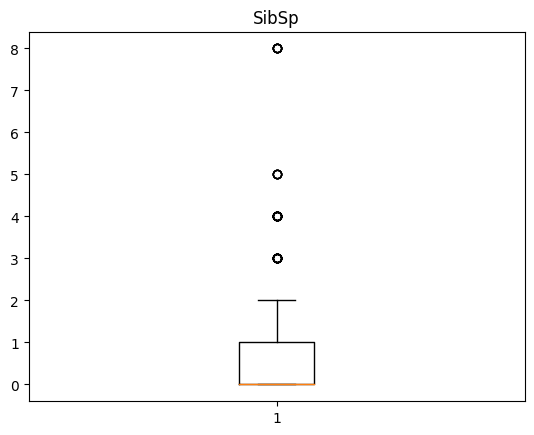

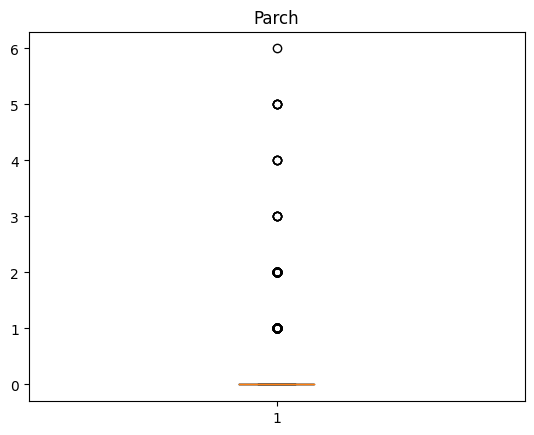

In [165]:
num_columns = ['Fare', 'SibSp', 'Parch']
for i in num_columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i);

In [80]:
df.Fare.skew()

4.787316519674893

In [81]:
df.SibSp.skew()

3.6953517271630565

In [82]:
df.Parch.skew()

2.7491170471010933

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.0,S


In [192]:
#Since all the three values Fare,SibSp and Parch have skewness, We can use IQR method
Q1 = np.percentile(['Fare'],25,method = 'midpoint')
Q2 = np.percentile(df['Fare'],50,method = 'midpoint')
Q3 = np.percentile(df['Fare'],75,method = 'midpoint')

In [193]:
print("Q1 is:",Q1)
print("Q1 is:",Q2)
print("Q1 is:",Q3)

Q1 is: 0.0
Q1 is: 0.0
Q1 is: 0.0


In [144]:
IQR = Q3 - Q1
print(IQR)

0.0


In [145]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

print('lower value: ',low_lim)
print('Upper Value: ',up_lim)

lower value:  0.0
Upper Value:  0.0


In [146]:
outliers = []

for x in df['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[]


In [166]:
Q1 = np.percentile(df['SibSp'],25,method = 'midpoint')
Q2 = np.percentile(df['SibSp'],50,method = 'midpoint')
Q3 = np.percentile(df['SibSp'],75,method = 'midpoint')

In [167]:
print("Q1 is:",Q1)
print("Q1 is:",Q2)
print("Q1 is:",Q3)

Q1 is: 0.0
Q1 is: 0.0
Q1 is: 1.0


In [168]:
IQR = Q3 - Q1
print(IQR)

1.0


In [169]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

print('lower value: ',low_lim)
print('Upper Value: ',up_lim)

lower value:  -1.5
Upper Value:  2.5


In [170]:
outliers = []

for x in df['SibSp']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [172]:
plt.boxplot(df['SibSp'])
plt.show();

In [173]:
Q1 = np.percentile(df['Parch'],25,method = 'midpoint')
Q2 = np.percentile(df['Parch'],50,method = 'midpoint')
Q3 = np.percentile(df['Parch'],75,method = 'midpoint')

In [174]:
print("Q1 is:",Q1)
print("Q1 is:",Q2)
print("Q1 is:",Q3)

Q1 is: 0.0
Q1 is: 0.0
Q1 is: 0.0


In [175]:
IQR = Q3 - Q1
print(IQR)

0.0


In [100]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

print('lower value: ',low_lim)
print('Upper Value: ',up_lim)

lower value:  0.0
Upper Value:  0.0


In [134]:
outliers = []

for x in df['Parch']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5, 2]


In [176]:
plt.boxplot(df['Parch'])
plt.show();

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

**Min Max Scaling**

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [178]:
minmax = MinMaxScaler()

In [185]:
X = df['SibSp']

In [186]:
X.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [187]:
X=X.values.reshape(-1, 1)

In [188]:
X_mm = minmax.fit_transform(X)

In [189]:
X_mm = pd.DataFrame(X_mm)

In [190]:
X_mm.describe()

,0
count,891.000000
mean,0.065376
std,0.137843
min,0.000000
25%,0.000000
50%,0.000000
75%,0.125000
max,1.000000


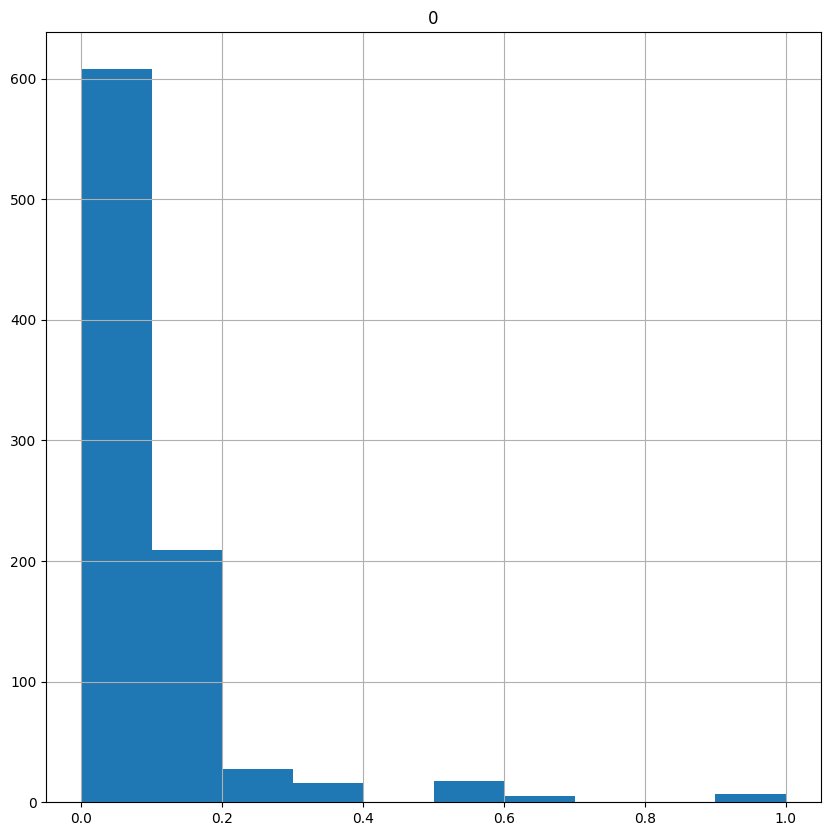

In [191]:
X_mm.hist(figsize=(10,10))
plt.show()